In [1]:
# code modified from here:
# https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/Full-Archive-Tweet-Counts/full_archive_tweet_counts.py

import os
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pylab as plt
import datetime
import seaborn as sns

## results of automatic labeling

In [2]:
tweets_classified_df = pd.read_csv("../classifier/tweets_classified3.csv", index_col=0)

In [3]:
print(len(tweets_classified_df))

1467983


In [4]:
tweets_classified_df.head()

tid                created_at  \
lid                                                 
1    647551397802737664  2015-09-25T23:20:58.000Z   
2    647551151932506113  2015-09-25T23:20:00.000Z   
3    647549503877156864  2015-09-25T23:13:27.000Z   
4    647549277401649152  2015-09-25T23:12:33.000Z   
5    647548980533022720  2015-09-25T23:11:22.000Z   

                                                  text cardiff-stance-climate  \
lid                                                                             
1    @lorabruncke @WHO @OpChemtrails @UN lie #COP21...                   none   
2    Geoengineering And The Dying Of The Trees http...                  favor   
3    @TerminatorBarbi @Airahairick @mrbangla @rocke...                  favor   
4    @OpChemtrails @UN lie #COP21 lie @Greenpeace l...                   none   
5    @canpoli @UN lie #COP21 lie @Greenpeace lie ex...                   none   

    cardiff-offensive cardiff-sentiment bertweet-sentiment geomotions-orig  \
lid                                                                          
1           offensive          negative           negative        surprise   
2       not-offensive           neutral           negative        surprise   
3       not-offensive          negative            neutral       confusion   
4           offensive          negative           negative        surprise   
5           offensive          negative           negative        surprise   

    geomotions-ekman cardiff-emotion  ... c_41 c_42 c_43  c_52  c_53  c_44  \
lid                                   ...                                    
1            neutral           anger  ...    0    0    0     0     0     0   
2            neutral         sadness  ...    0    0    0     0     0     0   
3            neutral           anger  ...    0    0    0     0     0     0   
4            neutral           anger  ...    0    0    0     0     0     0   
5            neutral           anger  ...    0    0    0     0     0     0   

     c_45  c_46  c_47  c_48  
lid                          
1       0     0     0     0  
2       0     0     0     0  
3       0     0     0     0  
4       0     0     0     0  
5       0     0     0     0  

[5 rows x 92 columns]

In [5]:
tweets_classified_df.columns

Index(['tid', 'created_at', 'text', 'cardiff-stance-climate',
       'cardiff-offensive', 'cardiff-sentiment', 'bertweet-sentiment',
       'geomotions-orig', 'geomotions-ekman', 'cardiff-emotion',
       'bertweet-emotions', 'nrc', 'nrc-highest', 'nrc-score', 'g_01', 'g_02',
       'g_05', 'g_06', 's_01', 's_02', 's_21', 's_22', 's_27', 's_04', 's_07',
       's_09', 's_20', 's_23', 's_24', 's_10', 's_11', 's_25', 's_30', 's_12',
       's_14', 's_16', 's_17', 's_18', 's_19', 's_29', 'c_01', 'c_02', 'c_03',
       'c_04', 'c_05', 'c_06', 'c_07', 'c_08', 'c_55', 'c_10', 'c_11', 'c_12',
       'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18', 'c_19', 'c_54', 'c_09',
       'c_20', 'c_21', 'c_22', 'c_50', 'c_23', 'c_49', 'c_24', 'c_25', 'c_26',
       'c_51', 'c_27', 'c_29', 'c_30', 'c_31', 'c_32', 'c_33', 'c_36', 'c_37',
       'c_38', 'c_39', 'c_40', 'c_41', 'c_42', 'c_43', 'c_52', 'c_53', 'c_44',
       'c_45', 'c_46', 'c_47', 'c_48'],
      dtype='object')

In [6]:
# export random sample for cross checking

ids = np.random.choice(len(tweets_classified_df), 100, replace=False)

In [7]:
tweets_classified_df.loc[ids].to_csv("../classifier/tweets_classified_random_sample100.csv")

In [8]:
# check counts
tweets_classified_df["cardiff-sentiment"].value_counts()

neutral     931686
negative    338337
positive    197960
Name: cardiff-sentiment, dtype: int64

In [9]:
tweets_classified_df["cardiff-emotion"].value_counts()

optimism    579827
anger       386030
sadness     306153
joy         195973
Name: cardiff-emotion, dtype: int64

In [10]:
tweets_classified_df["geomotions-ekman"].value_counts() #.plot.bar()

neutral     1174550
joy          185387
surprise      56472
anger         34105
fear           8547
sadness        7434
disgust        1488
Name: geomotions-ekman, dtype: int64

In [11]:
tweets_classified_df["geomotions-orig"].value_counts()

surprise          1123856
approval            64845
admiration          43558
curiosity           33793
neutral             26889
confusion           25457
disapproval         21612
annoyance           20757
gratitude           19005
pride               14195
caring              11081
disappointment       8950
sadness              7641
fear                 6928
anger                6447
desire               6284
excitement           6193
love                 4617
amusement            4420
joy                  2920
remorse              2729
disgust              1904
relief               1316
optimism             1073
nervousness           716
embarrassment         610
realization           186
grief                   1
Name: geomotions-orig, dtype: int64

In [12]:
tweets_classified_df["bertweet-emotions"].value_counts()

others      1236294
disgust      109933
joy           49429
fear          39790
anger         24782
surprise       5553
sadness        2202
Name: bertweet-emotions, dtype: int64

In [13]:
tweets_classified_df["nrc-highest"].value_counts()

neutral         574070
positive        282606
negative        183802
fear            176264
trust           158295
anger            39863
anticipation     31534
surprise         13952
sadness           6894
disgust            605
joy                 98
Name: nrc-highest, dtype: int64

In [14]:
tweets_classified_df["nrc"].isna().sum()

574070

<AxesSubplot:>

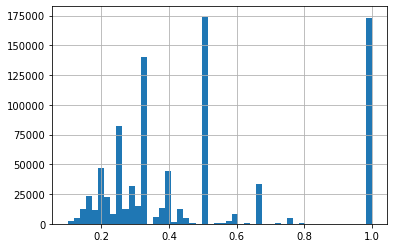

In [15]:
tweets_classified_df["nrc-score"].hist(bins=50)

In [16]:
# compare to counts by tim for consistency -> checked!
count_dict_tim = {'cardiff-stance-climate': {'none': 401220, 'favor': 1066763}, 
 'cardiff-offensive': {'offensive': 44852, 'not-offensive': 1423131},
 'cardiff-sentiment': {'negative': 338337, 'neutral': 931686, 'positive': 197960},
 'bertweet-sentiment': {'negative': 376438, 'neutral': 896848, 'positive': 194697},
 'geomotions-orig': {'surprise': 1123856, 'confusion': 25457, 'curiosity': 33793, 'fear': 6928, 'disgust': 1904, 'gratitude': 19005, 'excitement': 6193, 'approval': 64845, 'anger': 6447, 'admiration': 43558, 'disappointment': 8950, 'remorse': 2729, 'neutral': 26889, 'amusement': 4420, 'desire': 6284, 'caring': 11081, 'annoyance': 20757, 'disapproval': 21612, 'sadness': 7641, 'embarrassment': 610, 'love': 4617, 'nervousness': 716, 'joy': 2920, 'pride': 14195, 'relief': 1316, 'optimism': 1073, 'realization': 186, 'grief': 1},
 'geomotions-ekman': {'neutral': 1174550, 'fear': 8547, 'joy': 185387, 'disgust': 1488, 'surprise': 56472, 'anger': 34105, 'sadness': 7434},
 'cardiff-emotion': {'anger': 386030, 'sadness': 306153, 'optimism': 579827, 'joy': 195973},
 'bertweet-emotions': {'anger': 24782, 'others': 1236294, 'disgust': 109933, 'fear': 39790, 'joy': 49429, 'sadness': 2202, 'surprise': 5553},
 'nrc': {'fear': 327889, 'anger': 238695, 'negative': 562795, 'sadness': 259782, 'disgust': 185412, 'anticipation': 329305, 'positive': 593580, 'trust': 403964, 'joy': 222798, 'surprise': 161042}
 }

In [17]:
for key in count_dict_tim:
    print(key)
    labels = count_dict_tim[key]
    counter = 0
    for label in labels:
        counter += labels[label]
    print(counter)

cardiff-stance-climate
1467983
cardiff-offensive
1467983
cardiff-sentiment
1467983
bertweet-sentiment
1467983
geomotions-orig
1467983
geomotions-ekman
1467983
cardiff-emotion
1467983
bertweet-emotions
1467983
nrc
3285262


## map high dimensional emotions

In [18]:
tweets_classified_df['geomotions-ekman-tertiary'] = tweets_classified_df['geomotions-ekman'].map({'neutral': 'neutral',
                                               'joy': 'positive',
                                                'surprise': 'neutral',
                                                'anger': 'negative',
                                                'fear': 'negative',
                                                'sadness': 'negative',
                                                'disgust': 'negative'})

In [19]:
tweets_classified_df['cardiff-emotion-tertiary'] = tweets_classified_df['cardiff-emotion'].map({
'optimism': 'neutral',
'anger': 'negative',
'sadness': 'negative',
'joy': 'positive'
})

In [67]:
tweets_classified_df["nrc-highest-tertiary"] = tweets_classified_df["nrc-highest"].map({
'neutral': 'neutral',
'positive': 'positive',
'negative': 'negative',
'fear': 'negative',
'trust': 'positive',
'anger': 'negative',
'anticipation': 'positive',
'surprise': 'neutral',
'sadness': 'negative',
'disgust': 'negative',
'joy': 'positive'
})

In [21]:
tweets_classified_df["bertweet-emotions-tertiary"] = tweets_classified_df["bertweet-emotions"].map({
'others': 'neutral',
'disgust': 'negative',
'joy': 'positive',
'fear': 'negative',
'anger': 'negative',
'surprise': 'neutral',
'sadness': 'negative'})

In [22]:
# compare: cardiff-sentiment, bertweet-sentiment, geomotions-ekman,
# cardiff-emotion, bertweet-emotions, nrc-

In [29]:
tweets_classified_df[['cardiff-sentiment', 'bertweet-sentiment', 'nrc-highest-tertiary',
'cardiff-emotion-tertiary', 'geomotions-ekman-tertiary', 'bertweet-emotions-tertiary']]

cardiff-sentiment bertweet-sentiment nrc-highest-tertiary  \
lid                                                                 
1                negative           negative             negative   
2                 neutral           negative              neutral   
3                negative            neutral             positive   
4                negative           negative             negative   
5                negative           negative             negative   
...                   ...                ...                  ...   
1467979           neutral            neutral             negative   
1467980           neutral            neutral             positive   
1467981           neutral            neutral              neutral   
1467982          positive            neutral             positive   
1467983           neutral            neutral             positive   

        cardiff-emotion-tertiary geomotions-ekman-tertiary  \
lid                                                          
1                       negative                   neutral   
2                       negative                   neutral   
3                       negative                   neutral   
4                       negative                   neutral   
5                       negative                   neutral   
...                          ...                       ...   
1467979                  neutral                   neutral   
1467980                  neutral                   neutral   
1467981                 negative                   neutral   
1467982                  neutral                   neutral   
1467983                  neutral                  positive   

        bertweet-emotions-tertiary  
lid                                 
1                         negative  
2                          neutral  
3                         negative  
4                         negative  
5                         negative  
...                            ...  
1467979                    neutral  
1467980                    neutral  
1467981                    neutral  
1467982                    neutral  
1467983                    neutral  

[1467983 rows x 6 columns]

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [107]:
figsave_settings = {'bbox_inches': 'tight', 'facecolor': 'w', 'dpi': 150}

In [113]:
classifiers = ['cardiff-sentiment', 'bertweet-sentiment', 'nrc-highest-tertiary',
'cardiff-emotion-tertiary', 'geomotions-ekman-tertiary', 'bertweet-emotions-tertiary']
pairs = list(itertools.combinations(classifiers, 2))

cardiff-sentiment bertweet-sentiment
cardiff-sentiment nrc-highest-tertiary
cardiff-sentiment cardiff-emotion-tertiary
cardiff-sentiment geomotions-ekman-tertiary
cardiff-sentiment bertweet-emotions-tertiary
bertweet-sentiment nrc-highest-tertiary
bertweet-sentiment cardiff-emotion-tertiary
bertweet-sentiment geomotions-ekman-tertiary
bertweet-sentiment bertweet-emotions-tertiary
nrc-highest-tertiary cardiff-emotion-tertiary
nrc-highest-tertiary geomotions-ekman-tertiary
nrc-highest-tertiary bertweet-emotions-tertiary
cardiff-emotion-tertiary geomotions-ekman-tertiary
cardiff-emotion-tertiary bertweet-emotions-tertiary
geomotions-ekman-tertiary bertweet-emotions-tertiary


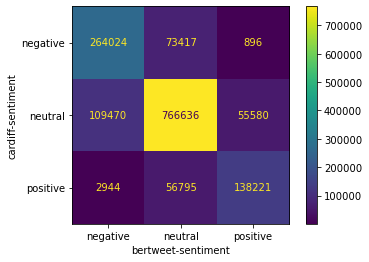

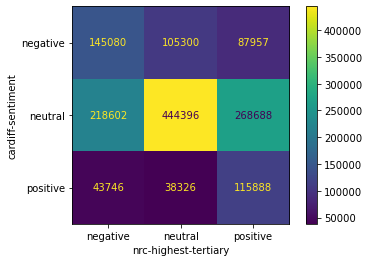

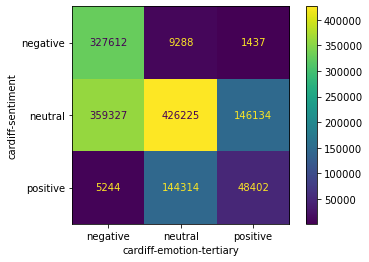

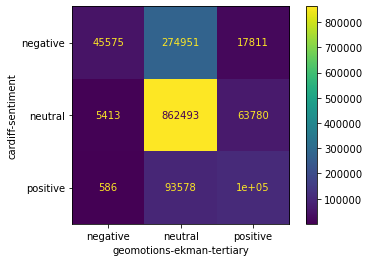

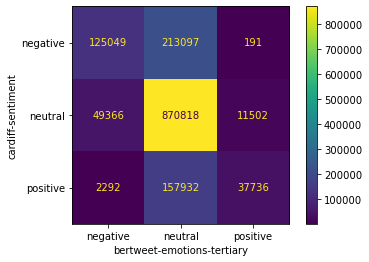

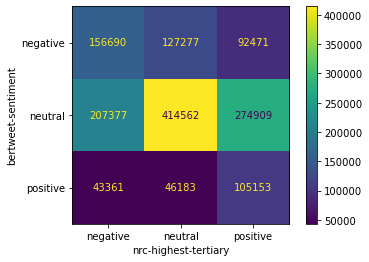

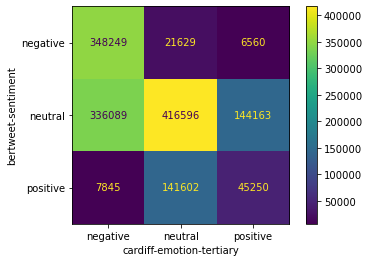

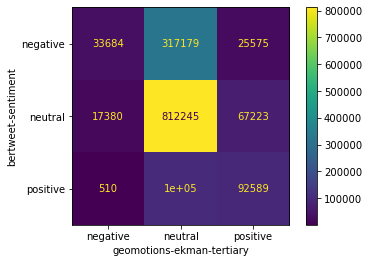

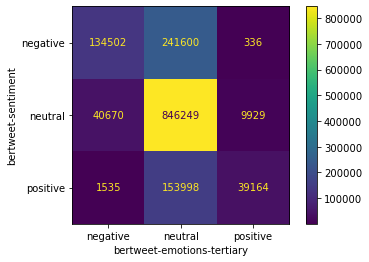

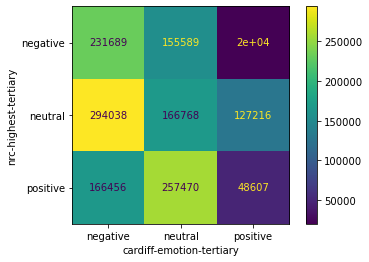

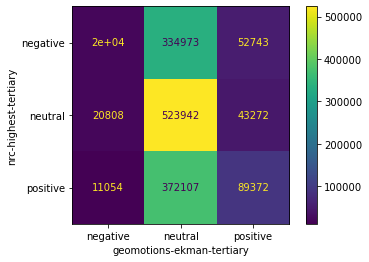

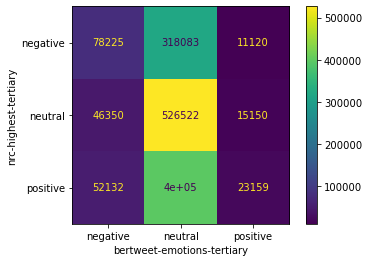

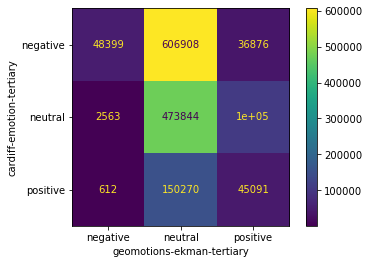

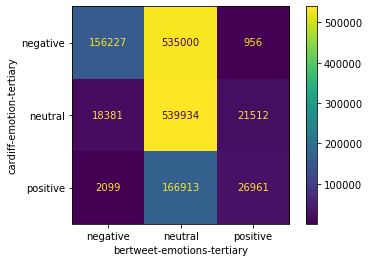

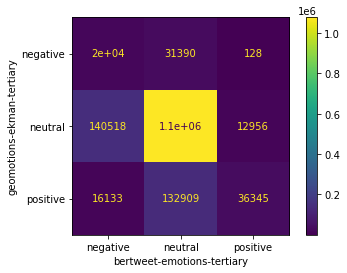

In [122]:
#pairs = ['cardiff-sentiment', 'bertweet-sentiment']

for classifier1, classifier2 in pairs:
    print(classifier1, classifier2)

    labels = np.sort(tweets_classified_df[classifier1].unique())
    cm = confusion_matrix(tweets_classified_df[classifier1],
                          tweets_classified_df[classifier2],
                          labels=labels)

    disp = ConfusionMatrixDisplay(cm, display_labels=labels)
    disp.plot()
    plt.xlabel(classifier2)
    plt.ylabel(classifier1)
    plt.savefig("figures/comparison_matrix_{}-{}.png".format(classifier1, classifier2), **figsave_settings)

## plot label counts by subquery or category

In [25]:
# counts by subquery

keywords_df = pd.read_csv("../data-download/Geoengineering keywords for Twitter query - review.csv", header=[1])
keywords_filtered = keywords_df[keywords_df["action after second update"] == "keep"]
subquery_ids = keywords_filtered["subquery_id"].values

tweets_classified_df[subquery_ids].sum()

g_01    666176
g_02     53325
g_05     53214
g_06     41421
s_01     12011
         ...  
c_44     45192
c_45      7749
c_46     14822
c_47      3073
c_48       428
Length: 78, dtype: int64

cardiff-sentiment
bertweet-sentiment
nrc-highest-tertiary
cardiff-emotion-tertiary
geomotions-ekman-tertiary
bertweet-emotions-tertiary
conspiracy-filter


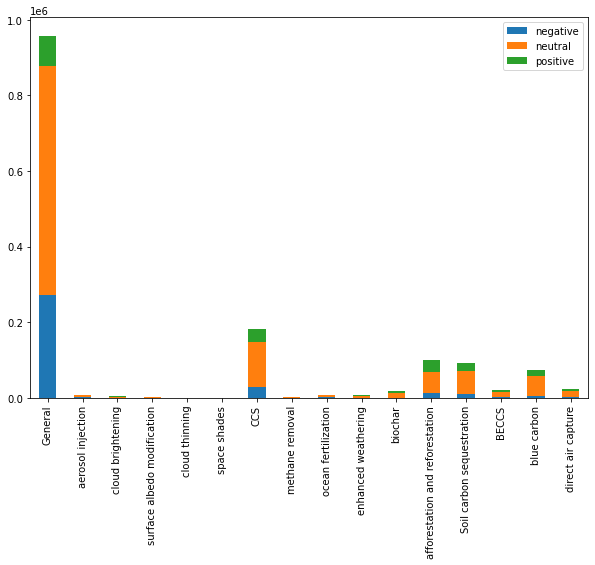

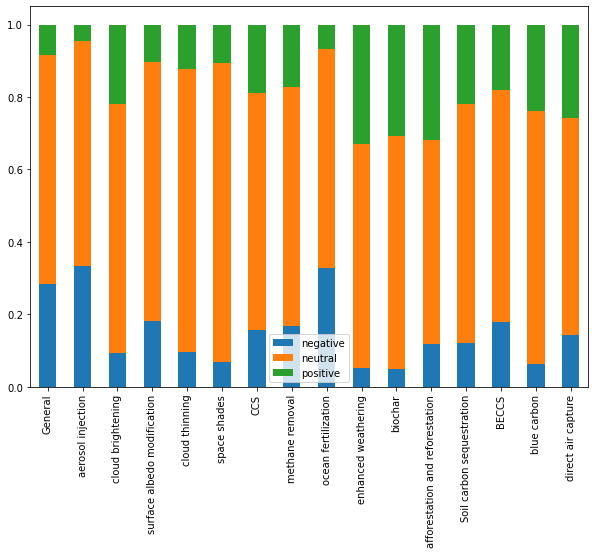

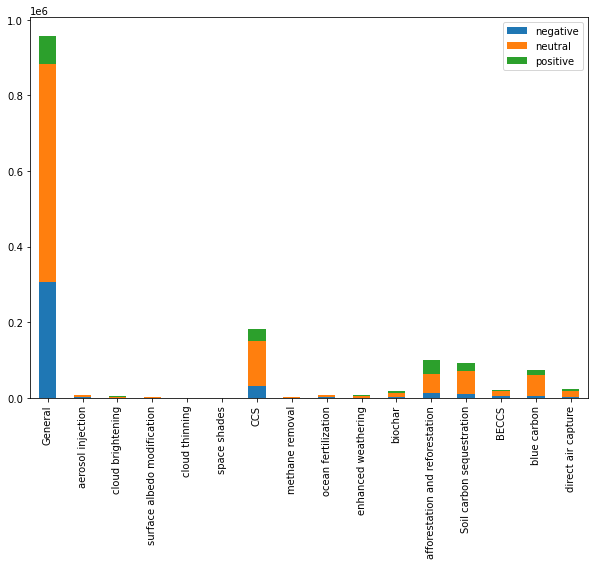

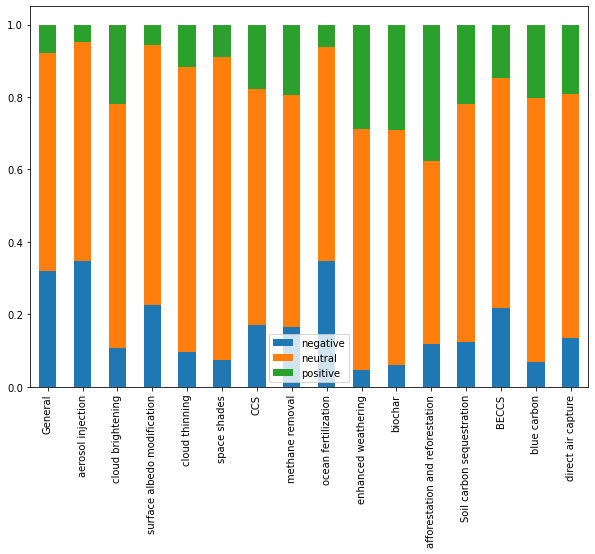

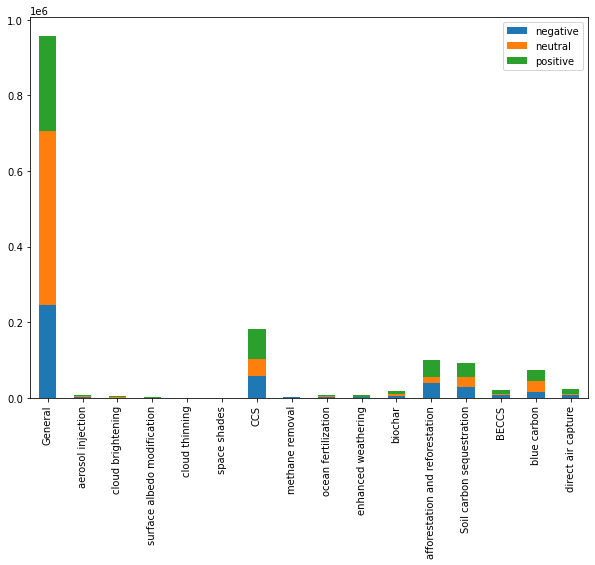

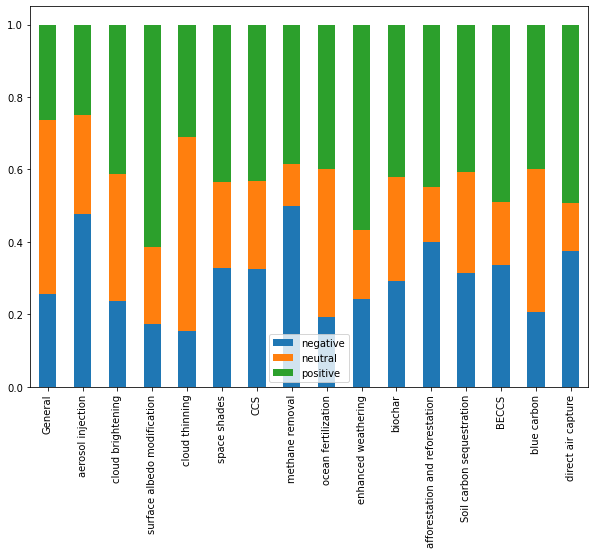

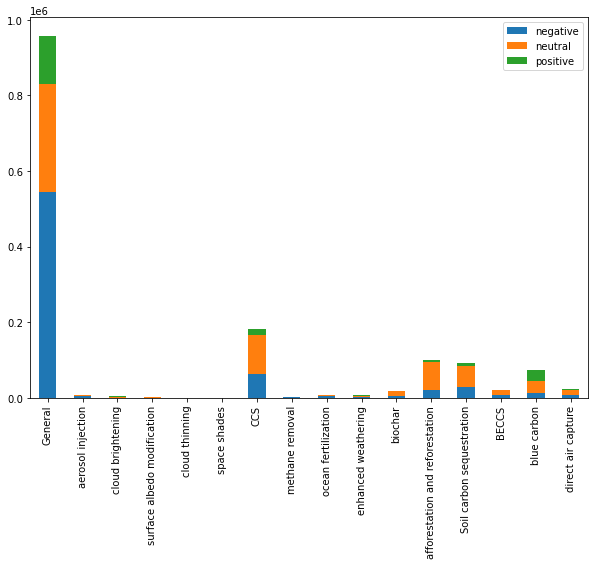

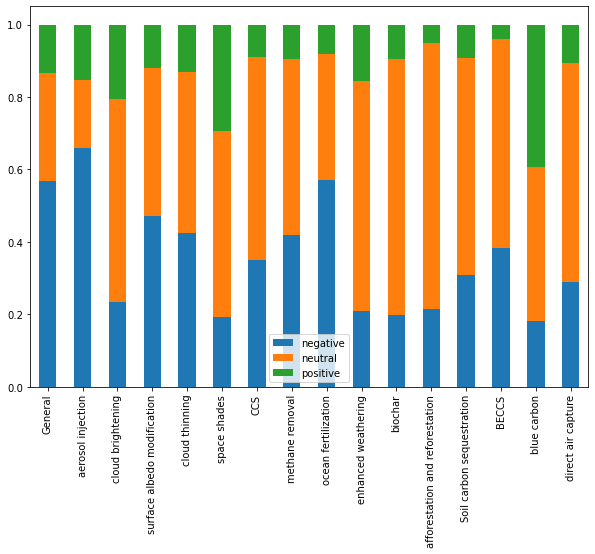

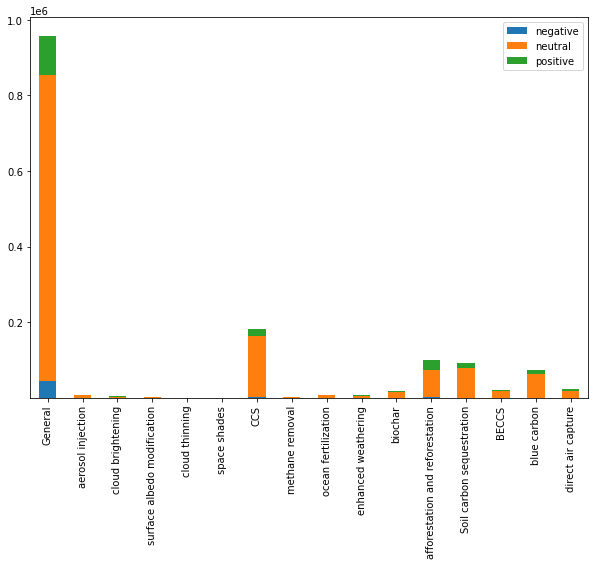

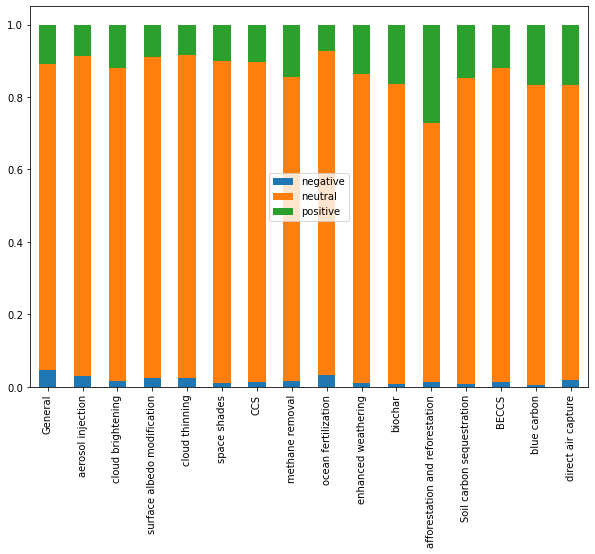

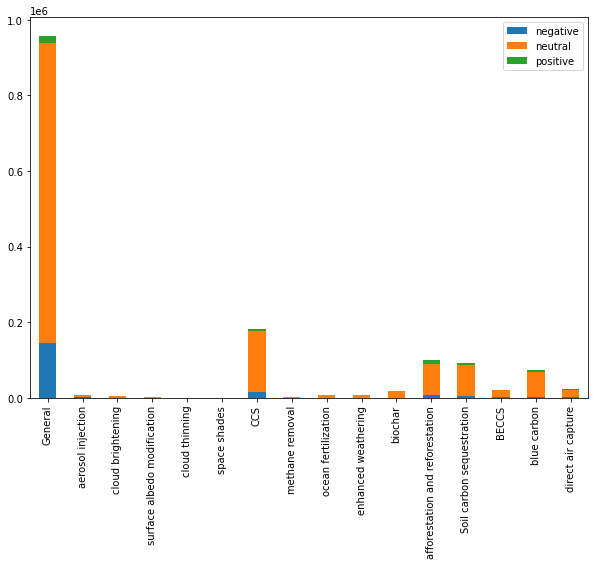

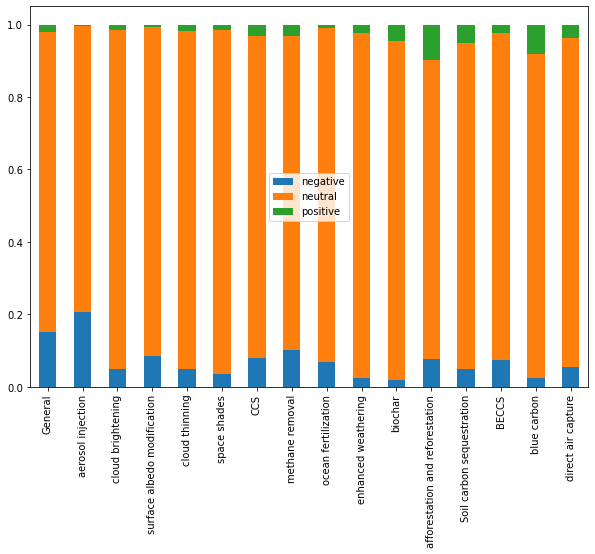

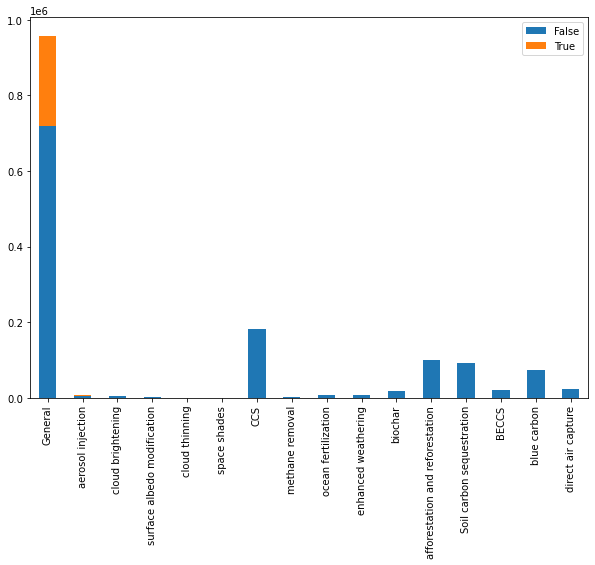

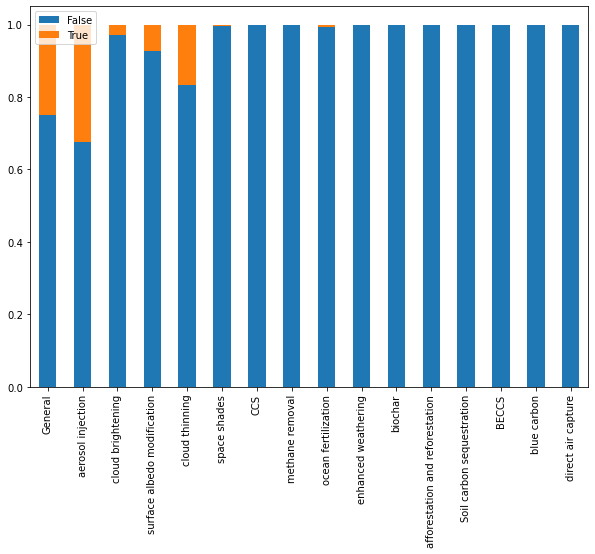

In [92]:
# counts by category

cat_level = 'technology_category' #  'category' or 'technology_category' or 'subquery_id'

value_counts = {}

for classifier_name in ['cardiff-sentiment', 'bertweet-sentiment', 'nrc-highest-tertiary',
'cardiff-emotion-tertiary', 'geomotions-ekman-tertiary', 'bertweet-emotions-tertiary', 'conspiracy-filter']:
    
    print(classifier_name)
    for cat in keywords_filtered[cat_level].unique():
        sids = keywords_filtered[keywords_filtered[cat_level] == cat]["subquery_id"].values
        #print(cat, sids)
        value_counts[cat] = tweets_classified_df[tweets_classified_df[sids].sum(axis=1) > 0][classifier_name].value_counts()

    class_counts = pd.DataFrame(value_counts).sort_index()
    
    fig, ax = plt.subplots(figsize=(10,7))
    class_counts.transpose().plot.bar(stacked=True, ax=ax)
    fig.savefig("figures/class_counts_{}_{}.png".format(cat_level, classifier_name), **figsave_settings)
    
    fig, ax = plt.subplots(figsize=(10,7))
    (class_counts / class_counts.sum()).transpose().plot.bar(stacked=True, ax=ax)
    fig.savefig("figures/class_shares_{}_{}.png".format(cat_level, classifier_name), **figsave_settings)

## look at data in jsonl file

In [ ]:
tweets = []

with open("../classifier/tweets_classified2.jsonl", 'r') as f:
    i = 0
    
    for line in f.readlines():
        i += 1
        tweet = json.loads(line)
        tweets.append(tweet)
        
        if i > 1000:
            break

In [ ]:
for tweet in tweets:
    #print(tweet['classes']['cardiff-sentiment'])
    em_dict = tweet['classes']['nrc']
    print(em_dict)
    key = max(em_dict, key=em_dict.get) if em_dict else None
    print(key)
    if key:
        print(em_dict[key])

In [ ]:
# from Tim's script

In [ ]:
import json
import re
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
#from tqdm import tqdm

In [ ]:
models = ['cardiff-stance-climate', 'cardiff-offensive',  # 'cards',
          'cardiff-sentiment', 'bertweet-sentiment',
          'geomotions-orig', 'geomotions-ekman', 'cardiff-emotion', 'bertweet-emotions', 'nrc']

stats = {
    model: defaultdict(int)
    for model in models
}
cooc_stats = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int))))

FILE_TWEETS = '../classifier/tweets_classified2.jsonl'
FILE_OUT = '/tweets_classified_new.csv'

with open(FILE_TWEETS, 'r') as f_in: #, \
#        open(FILE_OUT, 'w') as f_out:
    #f_out.write(','.join(models) + ',text\n')
    li = 0
    for line in f_in:#tqdm(f_in):
        li += 1
        tweet = json.loads(line)
        for model in models:
            labels = list(tweet['classes'][model].keys())
            #f_out.write('|'.join(labels) + ',')
            for label in labels:
                stats[model][label] += 1

            for model_cooc in models:
                if model_cooc != model:
                    labels_cooc = list(tweet['classes'][model_cooc].keys())
                    for label_cooc in labels_cooc:
                        for label in labels:
                            cooc_stats[model][label][model_cooc][label_cooc] += 1
        #f_out.write(re.sub(r'(\s+|,)', ' ', tweet['text']) + '\n')
        if li > 1000:
             break

print(stats)

In [ ]:
cooc_stats

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

        ax = plt.subplot(3,3,idx)

        cm = confusion_matrix([t['annotations_sub'].get(u1, 'UNK') for t in tweet_map.values()],
                              [t['annotations_sub'].get(u2, 'UNK') for t in tweet_map.values()],
                             labels=sorted(['UNK']+[v[0] for v in cat_map_sub.values()]))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=sorted(['UNK']+[v[0] for v in cat_map_sub.values()]))
        #disp = ConfusionMatrixDisplay.from_predictions(
        #    y_pred=[t['annotations_sub'].get(u1, 'UNK') for t in tweet_map.values()],
        #    y_test=[t['annotations_sub'].get(u2, 'UNK') for t in tweet_map.values()],
        #    display_labels=sorted(['UNK']+[v[0] for v in cat_map_sub.values()]))
        
        disp.plot(ax=ax)
        disp.ax_.tick_params(axis='x', rotation=90)
        ax.set_xlabel(u2)
        ax.set_ylabel(u1)

In [ ]:
# print(json.dumps(stats, indent=3))
# print(json.dumps(cooc_stats, indent=3))
print('plotting')
fig = plt.figure(figsize=(40, 40), dpi=120)
spi = 0
for i, model_i in enumerate(models):
    for j, model_j in enumerate(models):
        spi += 1
        if model_j != model_i:

            plt.subplot(len(models), len(models), spi, xmargin=10, ymargin=10)
            labels_i = sorted(list(cooc_stats[model_i].keys()), reverse=True)
            labels_j = sorted(list(cooc_stats[model_j].keys()), reverse=True)
            if model_i == 'cards':
                labels_i.remove('0_0')
            x = np.zeros((len(labels_i), len(labels_j)))
            for li, label_i in enumerate(labels_i):
                for lj, label_j in enumerate(labels_j):
                    x[li][lj] = cooc_stats[model_i][label_i][model_j][label_j]

            plt.imshow(x, interpolation='none')
            plt.ylabel(model_i, rotation=90)
            plt.xlabel(model_j)
            plt.xticks(np.arange(len(labels_j)), labels_j, rotation=90, fontsize=6)
            plt.yticks(np.arange(len(labels_i)), labels_i, fontsize=6)

print('layout+show')
fig.tight_layout()
plt.show()

## Filter for conspiracy theory tweets

In [81]:
# note: hashtag matching does not work with this package

import eldar
import itertools

kw_list = ['wedonotconsent',
        'chemtrail',
        'chemtrails',
        'haarp',
        'ChemPlanes',
        'elites',
        'skybasterds',
        'deathfromabove',
        'OpChemtrails',
        'RealGeoEngWatch',
        'LookUp',
        'Qanon',
        'QArmy',
        'sheep',
        'Wigington',
        '5GTakeover',
        '(Geoengineering AND Watch AND Global AND Alert)',
        'DeepState',
        'WeatherManipulation',
        'infowars.com',
        'killingUsAll',
        'StoptheMadnessNow',
        'climateviewer',
        'Warfare',
        'wakeup',
        'agenda21',
        'BigPharmaLies',
        'Bilderberg',
        'GeoChemFall']

#any combination of two of the following:
weak_kws = ['poison*',
            'toxic',
            'aluminum',
            'gates',
            'kill*',
            'depopulat*',
            '(sky OR skies)',
            'spray*',
            'expos*',
            'scam',
            'lies',
            'chemical*',
            'covert*']

tuples = itertools.combinations(weak_kws, 2)
combinations = ["(" + " AND ".join(t) + ")" for t in list(tuples)]

query_text = " OR ".join(kw_list + combinations)
print(query_text)
equery = eldar.Query(query_text, ignore_case=True)

wedonotconsent OR chemtrail OR chemtrails OR haarp OR ChemPlanes OR elites OR skybasterds OR deathfromabove OR OpChemtrails OR RealGeoEngWatch OR LookUp OR Qanon OR QArmy OR sheep OR Wigington OR 5GTakeover OR (Geoengineering AND Watch AND Global AND Alert) OR DeepState OR WeatherManipulation OR infowars.com OR killingUsAll OR StoptheMadnessNow OR climateviewer OR Warfare OR wakeup OR agenda21 OR BigPharmaLies OR Bilderberg OR GeoChemFall OR (poison* AND toxic) OR (poison* AND aluminum) OR (poison* AND gates) OR (poison* AND kill*) OR (poison* AND depopulat*) OR (poison* AND (sky OR skies)) OR (poison* AND spray*) OR (poison* AND expos*) OR (poison* AND scam) OR (poison* AND lies) OR (poison* AND chemical*) OR (poison* AND covert*) OR (toxic AND aluminum) OR (toxic AND gates) OR (toxic AND kill*) OR (toxic AND depopulat*) OR (toxic AND (sky OR skies)) OR (toxic AND spray*) OR (toxic AND expos*) OR (toxic AND scam) OR (toxic AND lies) OR (toxic AND chemical*) OR (toxic AND covert*) OR (

In [82]:
equery('test test test #wedonotconsent test')

True

In [83]:
an = pd.read_excel("../labeling/intercoder comparison_srm_sample.xlsx", sheet_name="comparison")

In [84]:
conspiracy_test = an[an["Category Name"] == "5 - Yes"].copy()

users = [user for user in  ["SeanLow", "brutschin@iiasa.ac.at", "galm",
                                              "jcroberts4@wisc.edu", "lueck@mcc-berlin.net",
                                              "muef", "repke@mcc-berlin.net"] if user in conspiracy_test.columns]

conspiracy_test["average"] = conspiracy_test[users].mean(axis=1)
conspiracy_test = conspiracy_test.sort_values('average', ascending=False)

In [85]:
conspiracy_test["boolean_filter"] = conspiracy_test["tweet__text"].apply(equery)
conspiracy_test["boolean_filter"].sum()

15

In [ ]:
# note: several false negatives remaining but little false positives

In [89]:
# apply to all tweets

tweets_classified_df["conspiracy-filter"] = tweets_classified_df["text"].apply(equery)

In [90]:
tweets_classified_df.to_csv("tweets_classified3_annotated.csv")

In [91]:
tweets_classified_df["conspiracy-filter"].value_counts()

False    1226860
True      241123
Name: conspiracy-filter, dtype: int64